In [1]:
import numpy as np
from scipy import optimize
from scipy.integrate import quad
from matplotlib import pyplot as plt
%matplotlib inline

# Problem 1

In [27]:
'''
-(au')' = f
a(0)u'(0) = c0
a(1)u'(1) = c1

integrate f from 0 to xj
-3x^3 + 3/2 x^2 - x if xj <= .5

'''

# setup the problem
c0 = 3./8
c1 = 5./4
U = lambda x: x**2 + .5*x + 5./16
Up = lambda x: 2.*x + .5
vectUp = np.vectorize(Up)
X = np.linspace(0,1,11)
h = .1
f = lambda x: -6*x**2 + 3.*x - 1. if x <= .5 else -1

# integrate using quad
Quad = np.vectorize(lambda B: quad(f,a=0,b=B)[0])

# make objective function
objective = lambda a: np.sum(((c0 - Quad(X))/a - vectUp(X))**2)
optA = optimize.minimize(objective, np.ones_like(X)*.1)['x']

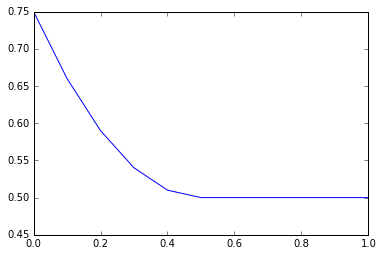

In [31]:
plt.plot(X, optA)
plt.show()

# Problem 2

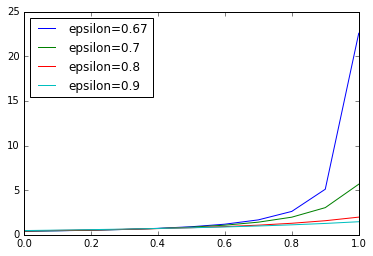

In [6]:
'''
-(au')' = f
a(0)u'(0) = c0
a(1)u'(1) = c1

integrate f from 0 to xj
-3x^3 + 3/2 x^2 - x if xj <= .5

'''

# set up the problem
c0 = 1.
c1 = 2.
X = np.linspace(0,1,11)
h = .1
f = lambda x: -1*np.ones_like(x)

# we evaluate the integral
Quad = np.vectorize(lambda B: quad(f,a=0,b=B)[0])

#iterate over values for epsilon
for eps in [.67,.7,.8,.9]:
    U = lambda x: x + 1 + eps*np.sin(x*eps**-2)
    Up = lambda x: 1. + np.cos(x*eps**-2)/eps
    vectUp = np.vectorize(Up)
    objective = lambda a: np.sum(((c0 - Quad(X))/a - vectUp(X))**2)
    optA = optimize.minimize(objective, np.ones_like(X))['x']
    plt.plot(X,optA, label='epsilon={}'.format(eps))
plt.legend(loc=2)
plt.show()